In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [38]:
# loading our data
df = pd.read_csv('housing.csv')
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [40]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [41]:
#  droping specific columns
df = df.drop(['housing_median_age',	'total_rooms','total_bedrooms', 'population','households' ,'median_income','ocean_proximity'], axis =1)

In [42]:
df.head(2)

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   median_house_value  20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [44]:
df.isnull().sum()

longitude             0
latitude              0
median_house_value    0
dtype: int64

In [45]:
df.describe()

,longitude,latitude,median_house_value
count,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,206855.816909
std,2.003532,2.135952,115395.615874
min,-124.350000,32.540000,14999.000000
25%,-121.800000,33.930000,119600.000000
50%,-118.490000,34.260000,179700.000000
75%,-118.010000,37.710000,264725.000000
max,-114.310000,41.950000,500001.000000


In [46]:
#  check duplicates
df.duplicated().sum()

325

In [47]:
df[df.duplicated()].tail()

,longitude,latitude,median_house_value
18353,-122.12,37.37,500001.0
18358,-122.10,37.36,500001.0
18360,-122.09,37.35,500001.0
18889,-122.23,38.10,92800.0
20598,-121.58,39.15,55500.0


In [48]:
#  it is impossible to remove all duplicates
df[df.duplicated()].head(10)

,longitude,latitude,median_house_value
56,-122.28,37.82,87500.0
194,-122.25,37.79,125000.0
511,-122.22,37.82,500001.0
514,-122.23,37.82,500001.0
517,-122.23,37.82,500001.0
1778,-122.35,37.94,105200.0
2039,-119.69,36.75,93100.0
2740,-115.56,32.78,76200.0
3432,-118.43,34.26,140900.0
3745,-118.40,34.16,364700.0


In [49]:
#  remove row which is totally duplicated
df.drop([517], axis = 0 , inplace = True)

In [50]:
df.iloc[517]

longitude               -122.24
latitude                  37.82
median_house_value    398600.00
Name: 518, dtype: float64

In [51]:
df

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0
...,...,...,...
20635,-121.09,39.48,78100.0
20636,-121.21,39.49,77100.0
20637,-121.22,39.43,92300.0
20638,-121.32,39.43,84700.0


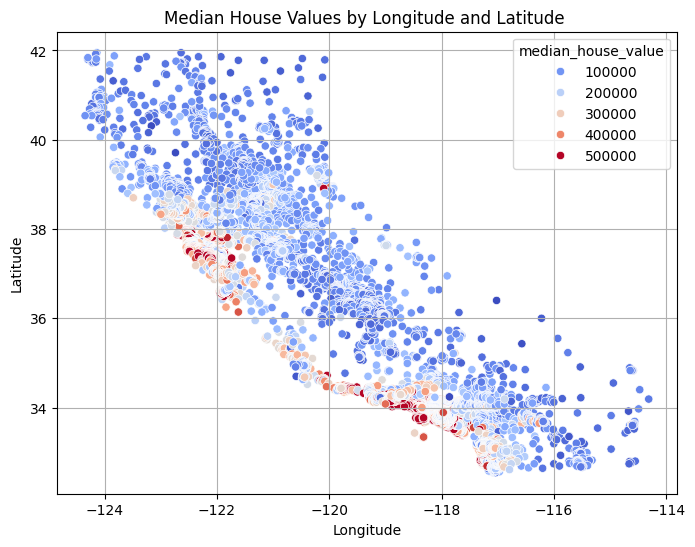

In [52]:
# data visulization using scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data= df , x="longitude", y="latitude", hue="median_house_value", palette="coolwarm")
plt.title("Median House Values by Longitude and Latitude ")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.show()

## Most of the expensive houses are on the west coast of California, while some areas have clusters of moderately priced houses.

In [53]:
#  splitting our data
X=df.drop(['median_house_value'], axis= 1)
y= df['median_house_value']

In [54]:
X.head()

,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85


In [55]:
# Normalize the features X .... or standrization to make (longitude and latitude )close to each other

from sklearn.preprocessing import Normalizer

In [56]:
transformer = Normalizer(norm='l1' )
transformer = Normalizer(norm='l2' )
transformer = Normalizer(norm='max' )

transformer.fit(X)
transformer.transform(X)

array([[-1.        ,  0.30990755],
       [-1.        ,  0.30976927],
       [-1.        ,  0.30963678],
       ...,
       [-1.        ,  0.32527636],
       [-1.        ,  0.32500824],
       [-1.        ,  0.32472781]])

In [57]:
transformer.transform(X).tolist()

[[-1.0, 0.30990755133764214],
 [-1.0, 0.30976926853215514],
 [-1.0, 0.3096367801047121],
 [-1.0, 0.3096114519427403],
 [-1.0, 0.3096114519427403],
 [-1.0, 0.3096114519427403],
 [-1.0, 0.3095296523517383],
 [-1.0, 0.3095296523517383],
 [-1.0, 0.30950433502371993],
 [-1.0, 0.3095296523517383],
 [-1.0, 0.3095861279240962],
 [-1.0, 0.3095861279240962],
 [-1.0, 0.3095861279240962],
 [-1.0, 0.30950433502371993],
 [-1.0, 0.3095861279240962],
 [-1.0, 0.3095861279240962],
 [-1.0, 0.30956080804776315],
 [-1.0, 0.30956080804776315],
 [-1.0, 0.30950433502371993],
 [-1.0, 0.30947902183691833],
 [-1.0, 0.30956080804776315],
 [-1.0, 0.30956080804776315],
 [-1.0, 0.30947902183691833],
 [-1.0, 0.30947902183691833],
 [-1.0, 0.30947902183691833],
 [-1.0, 0.3095354923127249],
 [-1.0, 0.3095354923127249],
 [-1.0, 0.3095354923127249],
 [-1.0, 0.3094537127903173],
 [-1.0, 0.3094537127903173],
 [-1.0, 0.3094537127903173],
 [-1.0, 0.3094537127903173],
 [-1.0, 0.30947902183691833],
 [-1.0, 0.30939723562607346],

### Applying kmeans model to our features

In [58]:
# Import the model
from sklearn.cluster import KMeans


In [59]:
KMeansModel = KMeans(n_clusters= 5 ,random_state=33 ,algorithm= 'auto')
KMeansModel.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='auto', n_clusters=5, random_state=33)

In [60]:
X_pred = KMeansModel.predict(X)
X_pred

array([1, 1, 1, ..., 4, 4, 4], dtype=int32)

In [61]:
centroids= KMeansModel.cluster_centers_
centroids

array([[-119.6896937 ,   35.98288145],
       [-121.86711787,   37.83854497],
       [-116.93609099,   33.05233055],
       [-118.11883786,   34.01349427],
       [-122.2855336 ,   39.91464427]])

In [62]:
labels = KMeansModel.labels_
labels

array([1, 1, 1, ..., 4, 4, 4], dtype=int32)

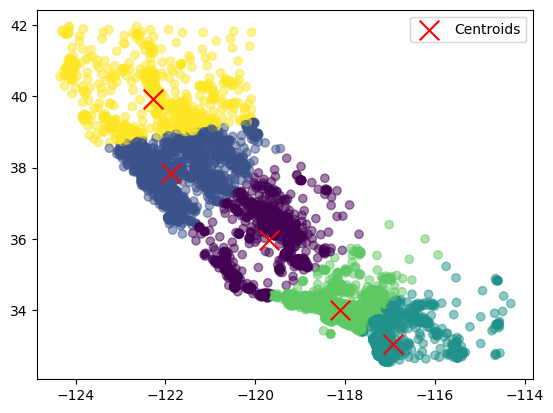

In [63]:
#  plotting clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', alpha=0.5  )
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='r', label='Centroids')
plt.legend()
plt.show()

<ipython-input-64-9f04621feb23>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = labels , y = df['median_house_value'], palette='hls')


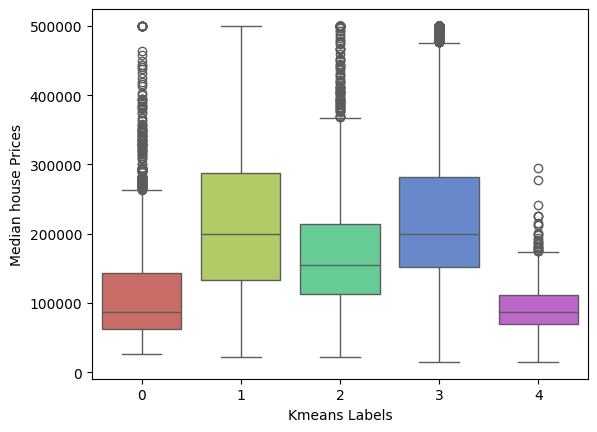

In [64]:
# distrbution of medain house prices
sns.boxplot(x = labels , y = df['median_house_value'], palette='hls')
plt.xlabel('Kmeans Labels')
plt.ylabel('Median house Prices')
plt.show()

### We can observe that the clusters effectively divide California into distinct regions, and these regions correspond reasonably well to different price ranges.

In [65]:
#  applying elbow method

# Calculate total wcss and plot and plot against k

wcss = [] #wcss is the inertia values

# Define the range of K values (no of clusters)
k_values = range(1,11)
k_values_list = [1,2,3,4,5,6,7,8,9,10]
# Initialize inertia list
inertia_values =[]

for k in k_values:
  # Initialize KMeans with current k
  kmeans = KMeans(n_clusters=k, n_init='auto',  random_state= 33)
  # Fit the KMeans model
  kmeans.fit(X)
  # Append the inertia values to the list
  inertia_values.append(kmeans.inertia_)

inertia_values

[176997.11458324466,
 26623.59281528675,
 18286.839908457383,
 14352.752622818929,
 10339.869357575759,
 9019.063013455685,
 8524.063706866877,
 6518.628274335099,
 5878.483309796124,
 5383.9431743036275]

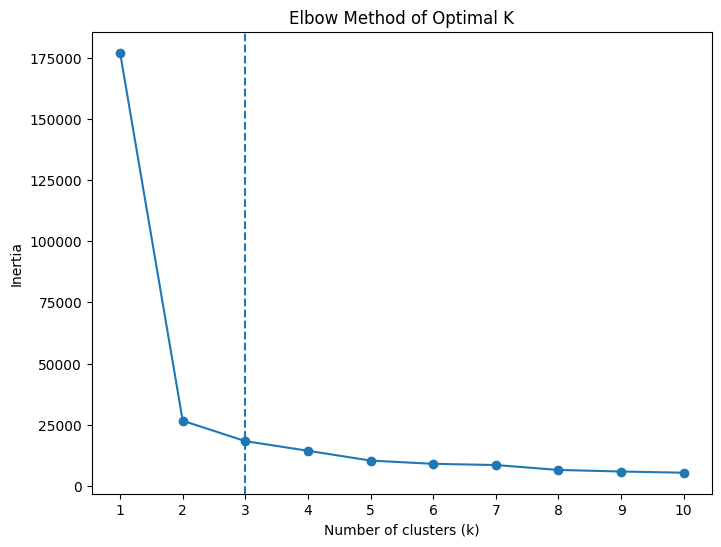

In [66]:
plt.figure(figsize=(8,6))
plt.plot(k_values, inertia_values, marker = 'o', linestyle='-')
plt.axvline(x=3, ls='--')
# Add more
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.title('Elbow Method of Optimal K')

plt.show()

In [67]:
#  applying silhouette method
from sklearn.metrics import silhouette_score
k_values = range(2,11)
silhouette_scores = []
for k in k_values:
  # Initialize KMeans with current k
  kmeans = KMeans(n_clusters=k, n_init='auto', random_state= 33)
  # Fit the KMeans model
  kmeans.fit(X)
  # Compute the silhoutte score for each cluster
  score = silhouette_score(X, kmeans.labels_)
  # Append the silhouette_scores to the list
  silhouette_scores.append(score)



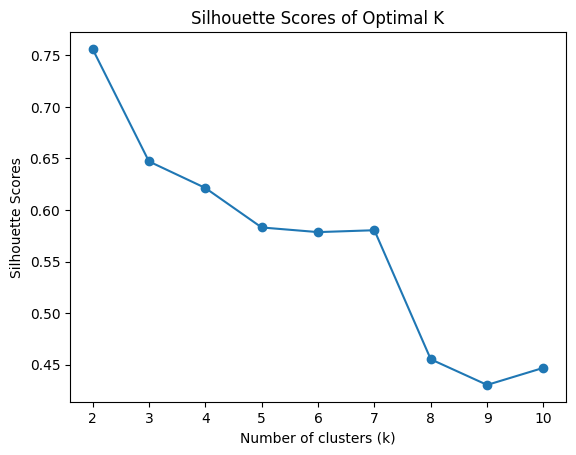

In [68]:
plt.plot(k_values, silhouette_scores, marker = 'o', linestyle='-')
# Add more
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Scores')
plt.xticks(k_values)
plt.title('Silhouette Scores of Optimal K')

plt.show()

In [69]:
# check the optimal no of clusters which equal 3

KMeansModel = KMeans(n_clusters= 3 ,random_state=33 ,algorithm= 'auto')
KMeansModel.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='auto', n_clusters=3, random_state=33)

In [70]:
centroids= KMeansModel.cluster_centers_
centroids

array([[-119.71125407,   35.99714984],
       [-117.88506072,   33.82458583],
       [-121.93025634,   38.1136893 ]])

In [71]:
labels = KMeansModel.labels_
labels

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

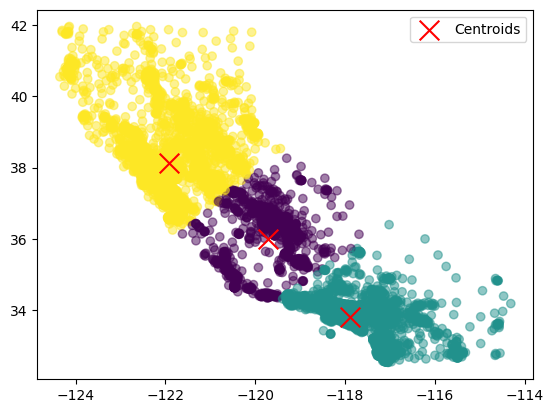

In [72]:
#  plotting clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', alpha=0.5  )
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='r', label='Centroids')
plt.legend()
plt.show()

<ipython-input-73-9f04621feb23>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = labels , y = df['median_house_value'], palette='hls')


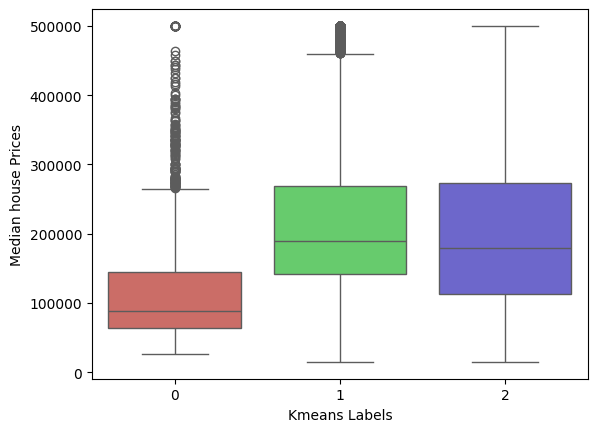

In [73]:
# distrbution of medain house prices
sns.boxplot(x = labels , y = df['median_house_value'], palette='hls')
plt.xlabel('Kmeans Labels')
plt.ylabel('Median house Prices')
plt.show()

### The northen and central clusters (clusters 0 and 1) have similar higher median house values compared to the southern cluster (cluster 2).

#** conclusion **

### 1- normalization provides us with a good scalling to fit our data into k-means model as there is abig difference between longitude and latitude values.

### 2- kmeans model plays a vital role for making  an efficient clusters depending on the longitude and latitude.

### 3- k more than 3 will be more efficient 





